## Abstract 

this assignment we have been task creating two supervised learning where the model learnis from labeled examples to make predictions or decision. two types of models that are supervised learning are classification and regression models. the datset of ``abcnews-date-text`` will be implement sentment analysis which is classification algorithm as itdentifying and classifying the text headline. display the resultd graphically. classification algorithms such as Naive bayes, SVM, for text categorization.  

Second part is to obtain 5 years' stock of DIS (The Walt Disney Company). Implement Time Series Forcasting on the "Close" feature of the dataset using on LSTM and try to improve this model, though techniques and use visual graph. predict the close values for one month and visualise any improvement. how i would this data to analysis using a web api throuh yfinance a stock data collect built of yahoo finance. used for up to date free stock quotes 

# ML_L7_INT_CA2_V3 

## EDA

Exploration of data can give us insights to help otipmise the analysis or model data, first of all let cover whats is sentiment analysis this process of classifying text as either positive, negative or neutral piece of text and detrmine whether the sentiment behind it as the classying catagorty                

In [1]:
import pandas as pd # read csv file into dataframe from pandas 
import seaborn as sns #seaborn for graphing visualation
import numpy as np 
import matplotlib.pyplot as plt #matplotlib for graph  
from pprint import pprint
from IPython import display

importing libaries to perform task on this data,**pandas** for maniluption of data and exploratation, **seaborn** and **matplotlib** to plot graphs. additional libaries to use to apply to data preparation , models used, predictions maded, cross vadilated model and tunning models to get the best results. 

Libaries for text analysis and sentiment analysis we will ``natural language processing`` and ``SentimentIntesityAnalyysis`` for sentiment analysis 

Using Tokenization we will breakdown complex sentence into words, Understand the importance of each of the words with respect to the sentence, and Produce a strutural description on an input sentence  

In [2]:
import nltk # Natural Language toolkit 
import nltk.corpus
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Sentiment Intensity Analyzer 
from nltk.corpus import stopwords #Stopwords 
from nltk.tokenize import word_tokenize # word tokens 
from nltk.stem import WordNetLemmatizer # to reduce words to the base form 


nltk.download(["names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt", ]
                
)



[nltk_data] Downloading package names to
[nltk_data]     C:\Users\glenn\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glenn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\glenn\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\glenn\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\glenn\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\glenn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [3]:
df = pd.read_csv("abcnews-date-text.csv") # create df from CSV 

df



,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


``read_csv`` to create data in DataFrame  

In [4]:
df.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

The dataframe contain two columns **publish_date** and **headline_text** with ``1,244,184 rows``. we need to explore how many unqiue values and if there are missing values and chart a graphs to see any outliers. there is a lot of data to handle in order to perform sentiment analysis  we will need to preparation for analysis. there is no missing data.  

Let create preprocess text wrap in a function which we first tokenize the documents using word_tokenize function, wre remove step using stepwords module, and we lemmatize the filtered_tokens using WordNetLemmatizer. 

First i want to irateover the headlines and set a good sample size as the data is so large it would take a long time to go through each headline appox 44 mins on current size of the data.  

In [5]:
headlines = set()

s = 0
f = 120000

for headline in df['headline_text'].iloc[s:f]:
    headlines.add(headline)
    display.clear_output(wait=True)
    
    

In [6]:
sia = SentimentIntensityAnalyzer()

results  = []

for line in headlines: 
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line 
    results.append(pol_score)

pprint(results[:3], width=100)


[{'compound': 0.4019,
  'headline': 'well fight to the end to save monaco prince albert',
  'neg': 0.174,
  'neu': 0.47,
  'pos': 0.356},
 {'compound': 0.34,
  'headline': 'public asked to highlight nt icons',
  'neg': 0.0,
  'neu': 0.676,
  'pos': 0.324},
 {'compound': 0.0,
  'headline': 'flannery fully aware of fittler factor',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


using Vader Sentiment Analyzer will simply rank a piece text based on the negative, neutral, and positive using the lexicon of postive and negative words. 

displaying the 3 results as you can headlines are 'woman jailed over fraud charges' with a neg score of 0.82, neu score of 0.18 with a compound of '-0.8442' and 'seacrh for missing sydney man to focus on bushland' with a neg score of 0.21, neu score of 0.784 these headlines are scored very negative. and the next headline is   'cmc investigator in mt isa' as you can see the neu is score at 1.0 

Compound is extremely senstive the postive = 1 and negative scores = -1, netural = 0. we can see that articules ranging between -1, 1. now we need to label are data for for use to train and test a model   

In [7]:
sa_df = pd.DataFrame.from_records(results)
sa_df

,neg,neu,pos,compound,headline
0,0.174,0.470,0.356,0.4019,well fight to the end to save monaco prince al...
1,0.000,0.676,0.324,0.3400,public asked to highlight nt icons
2,0.000,1.000,0.000,0.0000,flannery fully aware of fittler factor
3,0.000,0.750,0.250,0.2500,chance upbeat about wheatbelt drought aid bid
4,0.000,1.000,0.000,0.0000,china aims to put two people into space in 2005
...,...,...,...,...,...
119560,0.000,1.000,0.000,0.0000,meeting to consider levee flooding concerns
119561,0.330,0.400,0.270,-0.1531,special police team to badger thieves
119562,0.223,0.777,0.000,-0.3182,beazley silent on what will happen if he loses
119563,0.324,0.676,0.000,-0.3400,compulsory tests for qld sars suspects


writing into Dataframe the result of Sentiment scoring. before we label at glance we can see that plus or minus 0.2 from zero is a good marker to use in assigning the labels to headlines we dont want resultd decrease signifiicently so for now 0.2 is the benckmark 

In [8]:
sa_df['label'] = 0
sa_df.loc[sa_df['compound'] > 0.2, 'label'] =1
sa_df.loc[sa_df['compound'] < -0.2, 'label'] = -1
sa_df.head(n=1000) 

,neg,neu,pos,compound,headline,label
0,0.174,0.470,0.356,0.4019,well fight to the end to save monaco prince al...,1
1,0.000,0.676,0.324,0.3400,public asked to highlight nt icons,1
2,0.000,1.000,0.000,0.0000,flannery fully aware of fittler factor,0
3,0.000,0.750,0.250,0.2500,chance upbeat about wheatbelt drought aid bid,1
4,0.000,1.000,0.000,0.0000,china aims to put two people into space in 2005,0
...,...,...,...,...,...,...
995,0.000,1.000,0.000,0.0000,trek a dry run for ludwig leichardt event,0
996,0.242,0.549,0.209,-0.0772,inquest hears no bushfire response plan prepared,0
997,0.000,1.000,0.000,0.0000,mason has adhd bulldogs,0
998,0.286,0.714,0.000,-0.0516,hodge takes extended leave,0


In [9]:
print("Positive headlines:\n")
pprint(list(sa_df[sa_df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(sa_df[sa_df['label'] == -1].headline)[:5], width=200)


Positive headlines:

['well fight to the end to save monaco prince albert',
 'public asked to highlight nt icons',
 'chance upbeat about wheatbelt drought aid bid',
 'funds boost youth patrol',
 'defence force personnel test positive to drugs']

Negative headlines:

['mob hacks toddler father to death', 'driver found after fleeing car crash scene', 'security scare shakes world markets', 'shier blames board for abc cuts', 'statistics show crime rise for tamworth']


from this data we are looking at the value count of positive, nuetral , negative headlines. this data has most headline are netural and negetive. with positive headline last. this could be down to emotion as it a driving force in attract attention thias is just an observation 

In [10]:
print(sa_df.label.value_counts())

print(sa_df.label.value_counts(normalize=True) *100)

label
 0    56570
-1    39056
 1    23939
Name: count, dtype: int64
label
 0    47.313177
-1    32.665078
 1    20.021745
Name: proportion, dtype: float64


**Neutral** is 46%.  and **Negative** is at 34.67%. and **Positive** is 19.29%. we will now go to plot these results in a graph 

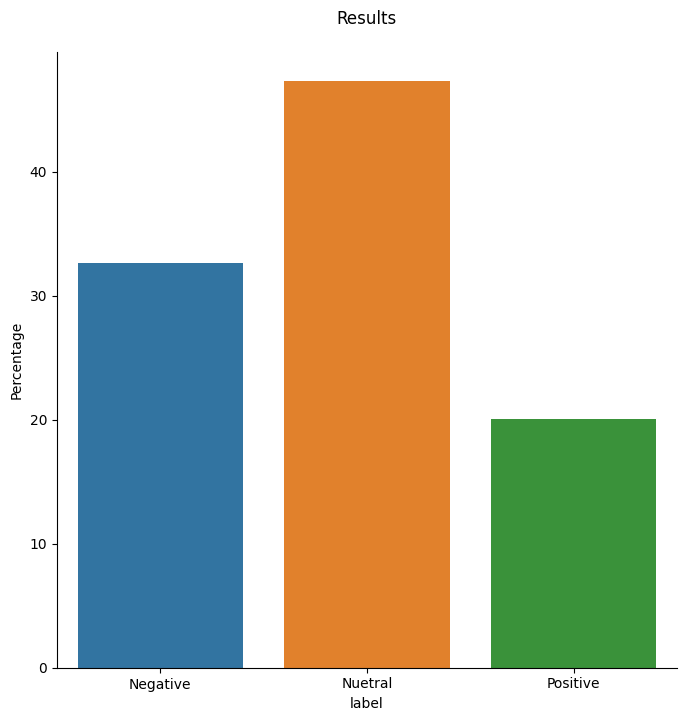

In [11]:
fig, ax = plt.subplots(figsize=(8,8))

counts = sa_df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Nuetral', 'Positive'])
ax.set_ylabel("Percentage")
ax.set_title('Results', pad=20)
sns.despine()

plt.show()

The assumption that we made earlier where headlines with compound value between 0.2 and -0.2 are considered neutral. The higher the margin, the larger the number of neutral headlines.

## Tokenizers 

deploying the libary for tonkenizing words with regular exression to gain accauracy in the model. this heklp us break up the model into meanful tokens. tokens can be used on sentence into words and so on. will wand to tokenizer words as the handlines are the segiments for analysis 

In [12]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords


tokenizer = RegexpTokenizer(r'\w+')

stop_words = stopwords.words('english')
print(stop_words[:20])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


**Stopwords** are words that provide no analysis and no value to the extract infomation, for example this words are objective and can be harder to categrories for the model as positive/nuetral/Postive 

In [13]:
def process_text(headlines):
    tokens = []
    for line in headlines: 
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

function created to irritate through the headlines line by line and separate by tokens. 

below we have the freqDist function to grab the most common positive words 

In [14]:
pos_lines = list(sa_df[sa_df.label == 1].headline)

pos_tokens  = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common()

[('boost', 1188),
 ('win', 1099),
 ('wins', 799),
 ('us', 675),
 ('new', 675),
 ('govt', 670),
 ('top', 668),
 ('support', 595),
 ('help', 575),
 ('security', 575),
 ('police', 480),
 ('welcomes', 464),
 ('council', 460),
 ('plan', 427),
 ('hopes', 426),
 ('says', 393),
 ('free', 389),
 ('safety', 382),
 ('care', 347),
 ('urged', 341),
 ('play', 334),
 ('iraq', 323),
 ('call', 314),
 ('confident', 308),
 ('world', 307),
 ('hope', 290),
 ('welcome', 287),
 ('funds', 284),
 ('strong', 280),
 ('award', 265),
 ('water', 264),
 ('cup', 263),
 ('ready', 260),
 ('peace', 255),
 ('trade', 253),
 ('health', 251),
 ('good', 248),
 ('deal', 247),
 ('qld', 247),
 ('group', 241),
 ('funding', 238),
 ('nsw', 236),
 ('interest', 233),
 ('back', 233),
 ('wa', 228),
 ('profit', 227),
 ('promises', 227),
 ('super', 223),
 ('australia', 221),
 ('home', 220),
 ('tourism', 219),
 ('festival', 213),
 ('rescue', 212),
 ('share', 211),
 ('may', 209),
 ('united', 208),
 ('growth', 207),
 ('final', 207),
 ('ind

Positive words display from the the article. judging by the words a lot of political papers posted and economy, Boost, win, us, Goverment  is the top words with my estimate is their is election on when this papers are issues 

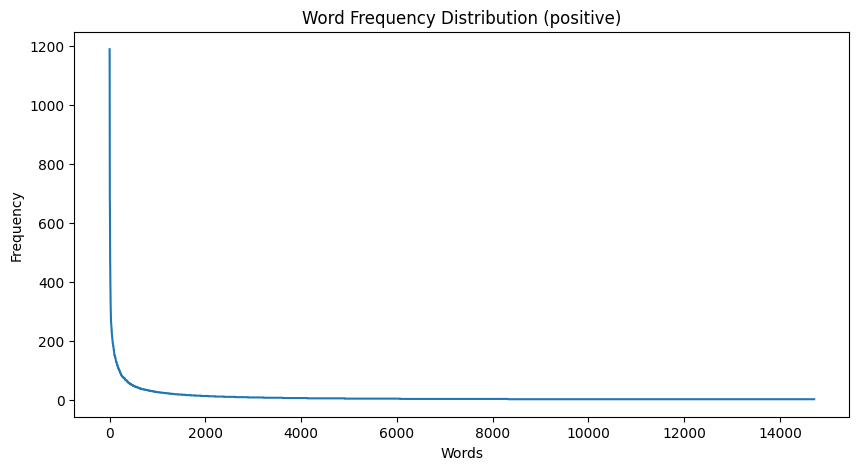

In [15]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (positive)")
plt.show()

the chart above shows the positive words frequency rank by the frequency so the most frequent word which is "Boost" 1, 1188 on the x-axixs 

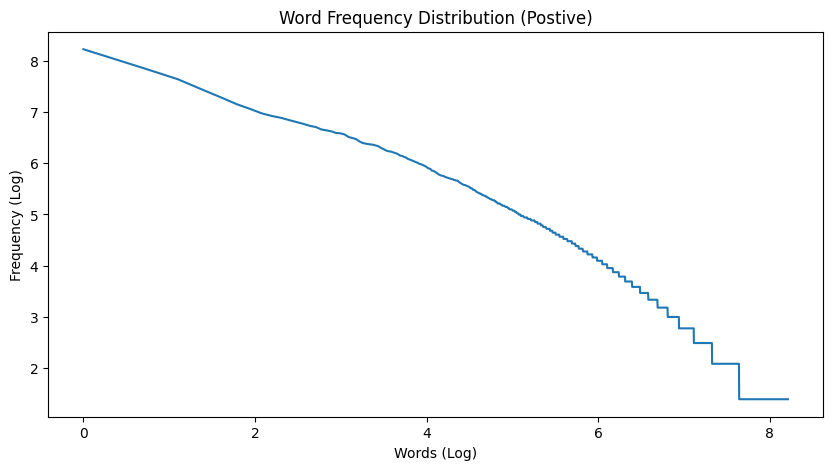

In [16]:
import math 
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]): 
    y_final.append(math.log(i + k+ z +t ))

x_val = [math.log(i + 1) for i in range(len(y_final))]
    
fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Postive)")
plt.plot(x_val, y_final)
plt.show()

this log plot almost straight with a zig-zag trail towards the ends. whats this is show is that our word distribution a vast minority of the words appear the most and the majority are featuring the least 

In [17]:
neg_lines = list(sa_df[sa_df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('police', 2140),
 ('man', 1819),
 ('us', 1724),
 ('killed', 1328),
 ('fire', 1199),
 ('govt', 1153),
 ('death', 1043),
 ('iraq', 995),
 ('crash', 969),
 ('court', 911),
 ('murder', 849),
 ('war', 844),
 ('attack', 822),
 ('charged', 760),
 ('charges', 718),
 ('dead', 718),
 ('missing', 716),
 ('says', 715),
 ('new', 666),
 ('ban', 664)]

same function here for the negative words, their is three times more negative in the number one spot as the breakdown is in geopolitical with 'war' being the number one word used, police is in the positive segment and also this one, but they have nearly 5 times more negative headlines. government issues are heavy portray the most in these articles 

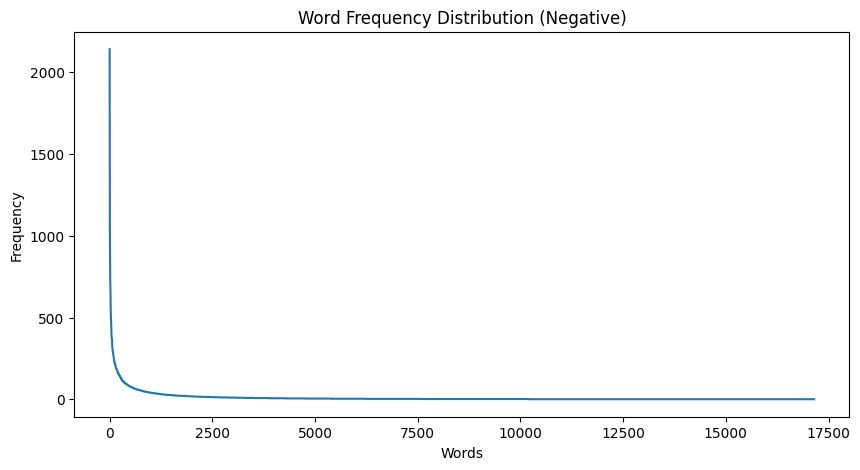

In [18]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

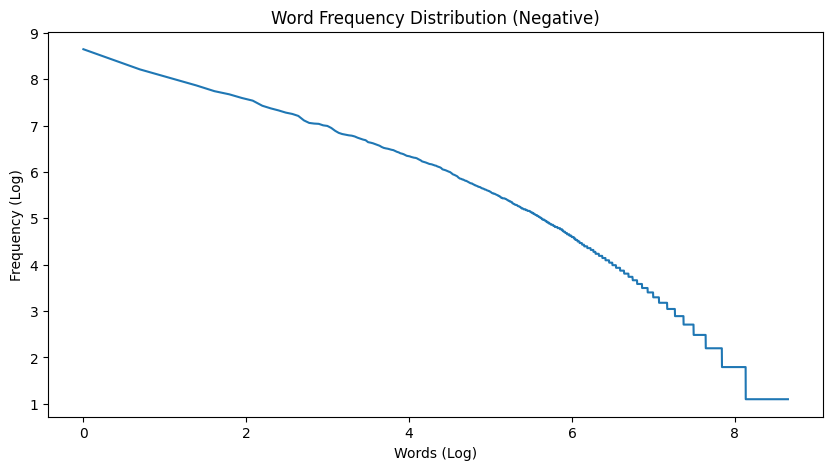

In [19]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

lets look at the frequency's police  is the with an count of 2140 for and the log seem to be a smooth slope but similar with a zig zag trail to the positive log. polices on the xaixis is 1,2140 for the function frequency distribution 


## Models classifier and prediction of headlines 

Segmentation analysis is using a classifier to categories of the headlines into positive/nuetral/negative. we can evaluate what trends and tones the headline do the sound positive or negative, we can also forecast and try to predict based on current sample the likelihood of the future article. 

One of the most common problem faced with data is imbalanced dataset. As we'll see below, we have a imbalanced dataset slight negative. 

we need to be careful with interpreting results from imbalanced dataset, as the model can take on high scores and decide to just take on predicting negative accuracy Paradox. a couple ways to counter this is **collect more data, change your metric, Oversampling the data,  Penalized Model** 

we can use varify methods and techiques to achieve this a libary we could us which is popular in python imblearn from sckit-learn https://imbalanced-learn.org/



In [20]:
import random 
from collections import defaultdict
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style(style="white")
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

**Libraries** - random for values choosen at random, collection build directory of values, Countvectoriser convert collection of text into a matrix of token counts,  plus train_test_split to split the data into training and test datas 

In [21]:
sa_df = sa_df[sa_df.label != 0]
sa_df.label.value_counts()


label
-1    39056
 1    23939
Name: count, dtype: int64

**Negative** count in this sample size is 39056 
**Postive** counrt in this sample size is 23939

 we are looking at the labels that respresent not neutral headlines before we build our model 

In [22]:
X = sa_df.headline
y = sa_df.label

feature_train, feature_test, label_train, label_test = train_test_split(
    X, y, test_size=0.2
)


set headlines at X into train feature and test feature  and labels into the target value for with test_size @.2  

In [23]:
vect = CountVectorizer(max_features=1000, binary=True)

feature_train_vect = vect.fit_transform(feature_train)

Creating the Countvectoriser to pass the headlines through and tokenized the headline on feature_train set we fit_transform and store the results in feature_train_vect, all we done now is  taking the headlines and vectorised them into an array of binary 1, 0. with binary set to True we get a value of 0 when the word doesnt exist in the analysis and a value of 1 for the words that do exist 

In [24]:
counts = sa_df.label.value_counts()
print(counts)

print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[-1] / sum(counts) * 100))

label
-1    39056
 1    23939
Name: count, dtype: int64

Predicting only -1 = 62.00% accuracy


by printing the count this mode is judging to preduicting negative headlines @ 62% its not a strong model. we need to more tuning to strenght the results. the results is good one. we can build on this as this wont tell us much we will have to look at precision and recall 

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

feature_train_res, label_train_res = sm.fit_resample(feature_train_vect, label_train)

**Libaries** imported Imblearn libary for balancing out are data by using the oversampling method called SMOTE looking at the minor data and creating new point to balance the data for training 

as the data is more negative than positve this will create positive data to fit the imbalance 

feature_train_res, label_train_res created to store SMOTE resampling of feature_train_ vect, Label_train  

In [26]:
unique, counts = np.unique(label_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(-1, 31185), (1, 31185)]


as you can see the data is now rebalance so now we can built a better more accurate mode with stronger results

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(feature_train_res, label_train_res)

nb.score(feature_train_res, label_train_res) * 100

88.21869488536154

Using the naive_bayes algorythm is used for high versalite model techiques, great for text ansd speeach recongition to train models 

definition - "The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work."" scikit learn - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Created MutlinormialNB() function and fitted on to feature_train_res, label_train_res data with score of 88%. this is a improvement of 28% on the last test results. 



In [28]:
feature_test_vect = vect.transform(feature_test)

y_pred = nb.predict(feature_test_vect)

y_pred

array([ 1,  1, -1, ..., -1, -1,  1], dtype=int64)

Using Countvetozier with ``vect`` to transform feature_test and predict future headlines if they are negative or postive even neutral as that is a part of the dataset  

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}".format(accuracy_score(label_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(label_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(label_test, y_pred))

Accuracy: 89.21

F1 Score: 86.05

Confusion Matrix:
 [[7047  824]
 [ 535 4193]]


***Accuracy score** is 88%
**F1 Score** is 85.86 



7000 predicted negative (-1) and was negative (-1). True Negative.
801 predicted positive (+1) and was positive (+1). True Positive.
586 predicted negative (-1) but was positive (+1). False Negative.
4212 predicted positive (+1) but was negative (-1). False Positive.


7000 were predicted negative at True Negative 
801 were predicted positve at True Positive
583 were predicted negative at False Negative. 
4212 were predicted positve at False Positive  

the correlation to Negative headlines are predicted in this dataset. 

the accuracy score of each value and f1 score is on strenght the results

## Cross Validation 

Lets compare and vaildated results with using cross-validation with the same data just on different positions

methods we can use is the K-fold cross- validation &  Monte Carlo cross-validation 

k-cross validation: "K-fold cross-validation: The examples are randomly partitioned into kk equal-sized subsets (usually 10). Out of the k subsets, a single subsample is used for testing the model, and the remaining k−1 subsets are used as training data. The cross-validation technique is repeated k times, resulting in a process where each subset is used exactly once as part of the test set. Finally, the average of the k-runs is computed. The advantage of this method is that every example is used in both the train and test sets." - LearnDatasci - https://www.learndatasci.com/tutorials/predicting-reddit-news-sentiment-naive-bayes-text-classifiers/

Monte Carlo cross Validation - "onte Carlo works somewhat differently. You randomly select (without replacement) some fraction of your data to form the training set, and then assign the rest of the points to the test set. This process is then repeated multiple times, generating (at random) new training and test partitions each time. For example, suppose you chose to use 10% of your data as test data. Then your test set on rep #1 might be points 64, 90, 63, 42, 65, 49, 10, 64, 96, and 48. On the next run, your test set might be 90, 60, 23, 67, 16, 78, 42, 17, 73, and 26. Since the partitions are done independently for each run, the same point can appear in the test set multiple times, which is the major difference between Monte Carlo and cross validation." - Stack Exchange - https://stats.stackexchange.com/questions/51416/k-fold-vs-monte-carlo-cross-validation/60967#60967

In [30]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=10, test_size=0.2)

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    feature_train, feature_test = X.iloc[train_index], X.iloc[test_index]
    label_train, label_test = y.iloc[train_index], y.iloc[test_index]
    
    feature_test_vect = vect.fit_transform(feature_train)
    feature_test_vect = vect.transform(feature_test)
    
    X_train_res, y_train_res = sm.fit_resample(feature_train_vect, label_train)
    

  
    nb.fit(feature_train_res, label_train_res)
    y_pred = nb.predict(feature_test_vect)
    
   
    accs.append(accuracy_score(label_test, y_pred))
    f1s.append(f1_score(label_test, y_pred))
    cms.append(confusion_matrix(label_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))



Average accuracy across folds: 63.58%

Average F1 score across folds: 52.99%

Average Confusion Matrix across folds: 
 [[5388.4 2426.4]
 [2161.9 2622.3]]


Average accuracy across folds: 64.37%

Average F1 score across folds: 53.28%

Average Confusion matrix: 
5540.5 predicted negative (-1) and was negative (-1). True Negative.
2232.7 predicted positive (+1) and was positive (+1). True Positive.
2256.7 predicted negative (-1) but was positive (+1). False Negative.
2569.1 predicted positive (+1) but was negative (-1). False Positive.

based on this results the cross validation scores lower accuracy score of 64.37% compare to 88% this a decrease the perform and accuracy of the model with f1 score being down to 53%. I used K fold crossvalidation because of the advantage of using both training and test set 

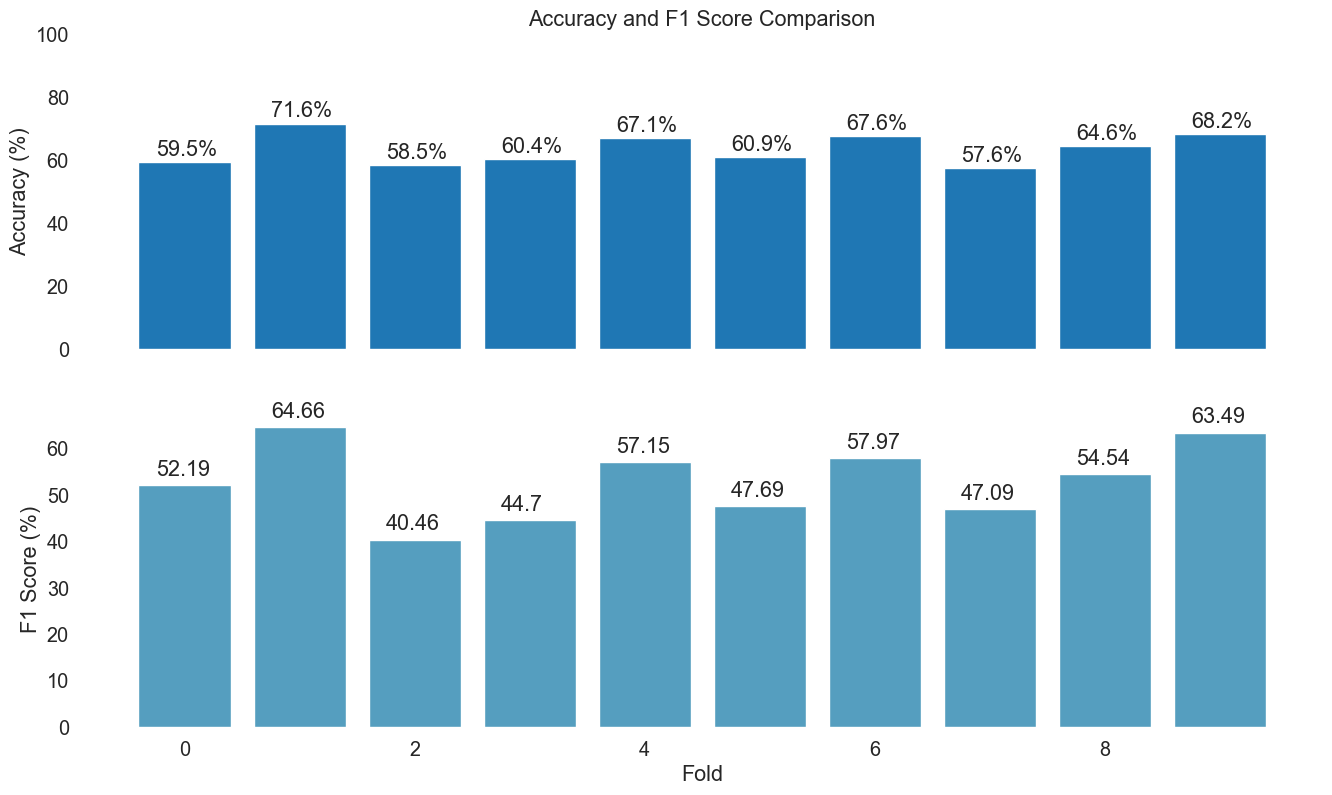

In [31]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax2.set_ylabel('F1 Score (%)')
ax2.set_xlabel('Fold')

ax1.set_title('Accuracy and F1 Score Comparison')
ax1.set_ylim([0, 100])

sns.despine(bottom=True, left=True)

plt.show()

see the graph of the perform of n_split and fold show the 10 models of accuarauy and f1 score. 

Accuracy is relative similar per model in the mid to low 60% . f1 score ranges 62.67% to 49.12%

In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(), 
    BernoulliNB(), 
    LogisticRegression(), 
    SGDClassifier(), 
    LinearSVC(), 
    RandomForestClassifier(), 
    MLPClassifier()
]

results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [], 
        'confusion_matrix': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    feature_train, feature_test  = X.iloc[train_index], X.iloc[test_index]
    label_train, label_test = y.iloc[train_index], y.iloc[test_index]
    
    feature_train_vect = vect.fit_transform(feature_train)    
    feature_test_vect = vect.transform(feature_test)
    
    feature_train_res, label_train_res = sm.fit_resample(feature_train_vect, label_train)
    
    for model in models:
        model.fit(feature_train_res, label_train_res)
        y_pred = model.predict(feature_test_vect)
        
        acc = accuracy_score(label_test, y_pred)
        f1 = f1_score(label_test, y_pred)
        cm = confusion_matrix(label_test, y_pred)
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
        

In [33]:
for model, d in results.items(): 
    mean_acc = sum(d['accuracy']) / len(d['accuracy']) * 100 
    mean_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100 
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '_' * 30
    
    s = f"""{model}\n{slashes}
    Avg.Accuracy: {mean_acc:.2f}%
    Avg. F1 Score: {mean_f1:.2f}
    Avg. Confusion Matrix 
    \n{avg_cm}"""
    
    print(s)

MultinomialNB
______________________________
    Avg.Accuracy: 89.44%
    Avg. F1 Score: 86.38
    Avg. Confusion Matrix 
    
[[7050.1   779.65]
 [ 550.6  4218.65]]
BernoulliNB
______________________________
    Avg.Accuracy: 88.97%
    Avg. F1 Score: 86.06
    Avg. Confusion Matrix 
    
[[6918.2   911.55]
 [ 478.1  4291.15]]
LogisticRegression
______________________________
    Avg.Accuracy: 89.56%
    Avg. F1 Score: 86.96
    Avg. Confusion Matrix 
    
[[6895.95  933.8 ]
 [ 381.4  4387.85]]
SGDClassifier
______________________________
    Avg.Accuracy: 88.49%
    Avg. F1 Score: 86.18
    Avg. Confusion Matrix 
    
[[6627.2  1202.55]
 [ 247.05 4522.2 ]]
LinearSVC
______________________________
    Avg.Accuracy: 89.33%
    Avg. F1 Score: 86.75
    Avg. Confusion Matrix 
    
[[6852.35  977.4 ]
 [ 367.25 4402.  ]]
RandomForestClassifier
______________________________
    Avg.Accuracy: 87.30%
    Avg. F1 Score: 83.70
    Avg. Confusion Matrix 
    
[[6889.1   940.65]
 [ 659.5  4109.7

# Part II - Stock Market analysis with LSTM model

Standard Recurrent Neural Networks (RNNs) suffer from short-term memeory due to a vanishing gradient  Problem that emerges when working with longer data sequences. 

Long Short term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problem. 

definition of LSTM - "LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.
LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!
All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer."

Understanding LSTM Networks - https://colah.github.io/posts/2015-08-Understanding-LSTMs/

LSTM are great for analysying harder to predict values such as timeseries for stock prices when the market is constaintly up and down from seconds to days to weeks you get my drift.  they help extend the RNN performance to connect the gap over the period time the model is learning 

## EDA

**Libaries**  yfinance for downloading stock data for the last five years for disney, matplotlib inline for plotlyinh graphs, pylab for the paramenters on graphs, plotly for plotting better visauls and interactive graph, Keras for LSTM model to predict future results, math to do equations, sklearn to process the data & run model selection, itertools, and tensorflow. 

Downloading stock data using the for function a appending into a Dataframe 

In [34]:
import yfinance as yf
%matplotlib inline
from pylab import rcParams
import datetime as dt 
import warnings 
import plotly 
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.io as pio
from plotly.subplots import make_subplots 
import keras
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.callbacks import ModelCheckpoint
import itertools
import random
import tensorflow as tf
import keras_tuner as kt

tickerString = ['DIS']
df_list = list()
for ticker in tickerString:
    data = yf.download(ticker, group_by='Ticker', period='1d', start='2018-07-01', end='2023-07-01')
    data['ticker'] = ticker
    df_list.append(data)

df = pd.concat(df_list)


df = df.reset_index()



[*********************100%***********************]  1 of 1 completed


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
 7   ticker     1258 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 78.8+ KB


exploring the info by function ``.info `` 7 columns with dtypes 5 floats and 1 int  ['Date , 'Open' , 'Close', 'Adj Close' , 'Volume' , 'ticker' ] 

In [36]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2020-12-29 19:29:51.414944256,130.688577,132.022909,129.128339,130.586391,130.149652,1.149552e+07
min,2018-07-02 00:00:00,84.489998,86.690002,79.070000,84.169998,84.169998,2.406300e+06
25%,2019-10-01 06:00:00,108.992498,110.157501,107.652502,109.174999,108.120003,7.293575e+06
50%,2020-12-29 12:00:00,125.689999,127.325001,123.695000,125.025002,125.025002,9.400150e+06
75%,2022-03-29 18:00:00,147.369999,148.639996,146.002499,147.312496,146.855156,1.284455e+07
max,2023-06-30 00:00:00,200.190002,203.020004,195.399994,201.910004,201.910004,8.741070e+07
std,NaN,28.820401,28.981018,28.624567,28.760099,28.915973,7.549473e+06


``.desrcibe`` show the count, mean, min values of the dataset using this to visaul the data very and make judgement to what analysis need to be done 

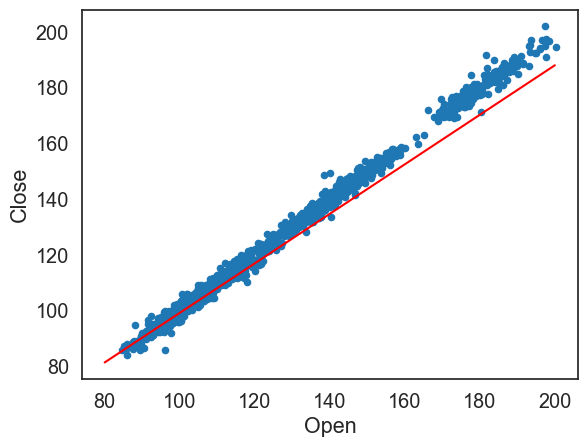

In [37]:
df.plot.scatter('Open', 'Close')
prediction = lambda x, w1=.82, b=23.99: x * w1 +b 
plt.plot([80, 200], [prediction(70), prediction(200)], 'red')


this graph show the linear prediction between opening and closes as we can see the opening price and close are posative with no outlier . this tell us very littel about predicting price we will need conduct more analysis 

In [38]:
def mse(actual, predicted):
    return np.mean((actual -predicted) ** 2)

print(mse(df['Open'], prediction(df['Close'])))

30.570925070146554


MSE for is a large 30 which stated that this model isnt effect at predict price in the future. 

In [39]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.3, subplot_titles=('Disney Price ($)', 'Volume'), 
               row_width=[0.2, 0.7])


fig.add_trace(go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                low=df["Low"], close=df["Close"], name="OHLC"), 
                row=1, col=1
)

fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], showlegend=True,opacity=1,marker_line_color='green',
                     marker_line_width=2), row=2, col=1)

fig.update_xaxes( row=1,col=1,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
   
)
fig.update_yaxes(gridcolor='Lightgrey',showgrid=True,zeroline=False)
fig.update_xaxes(gridcolor='Lightgrey',showgrid=True)

fig.update(layout_xaxis_rangeslider_visible=False)

fig.update_layout(title='Growth Of Disney Stock over the years',
                  yaxis_title='Price',
                  showlegend=False,
                  paper_bgcolor='#efefef',
    plot_bgcolor='#efefef',
    
    font_family='Monospace',
    font_color='#000000',
    font_size=15,
                 )


fig.show()

the charts show the stock over the years with the volume. Disney has range from 200 to 100 in the last five years 

### LSTM model 


for the model we need to predicted the future close price of Disney. my plan is to base the model on the target for close and training_set will be the rest of the dataset.

first we need to scale the training_set and the store into X_train, y_train. once we have this complete we will build are model  

In [40]:
data = df.filter(['Close'])


dataset = data.values

training_data_len = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]

x_train = []

y_train = []

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

Epoch 1/7
71/71 [==============================] - 8s 33ms/step - loss: 0.0682
Epoch 2/7
71/71 [==============================] - 2s 33ms/step - loss: 0.0367
Epoch 3/7
71/71 [==============================] - 2s 33ms/step - loss: 0.0310
Epoch 4/7
71/71 [==============================] - 2s 34ms/step - loss: 0.0321
Epoch 5/7
71/71 [==============================] - 2s 33ms/step - loss: 0.0278
Epoch 6/7
71/71 [==============================] - 2s 33ms/step - loss: 0.0247
Epoch 7/7
71/71 [==============================] - 2s 33ms/step - loss: 0.0240


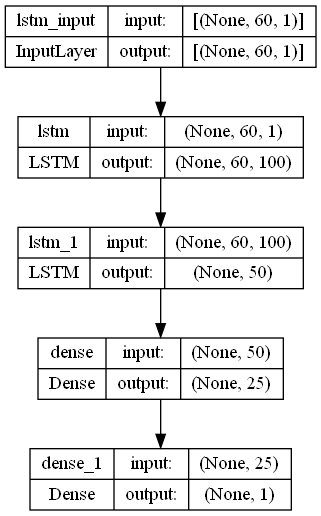

In [41]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(x_train, y_train, batch_size=16, epochs=7 )

keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)
     

for are first model  we build this with epoch of 7 witn range loss [0.0636, 0.0382, 0.0340, 0.0292, 0.0262, 0.0243] the models has perform well 


In [42]:
test_data = scaled_data[training_data_len - 60:, :]

x_test, y_test = [], []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
y_test =np.asarray(y_test).reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

print(f'rmse:{rmse}')


2/2 [==============================] - 2s 29ms/step
rmse:2.400619768923371


we now have are model set up, we have to predict values for testing. with RMSE 2.73 for the test is really good score. the low the score in single digit means the model is more effective 

In [43]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['Close'], name='Train'))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], name='Val'))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], name='Predictions'))

fig.update_layout(
    title= 'LSTM Model - Stock: Disney - Trained Model',
    xaxis=dict(title='Date', showgrid=True, gridcolor='lightgray'),
    yaxis=dict(title='Close Price USD ($)', showgrid=True, gridcolor='lightgray'),
    legend=dict(x=0.99, y=0.99, bordercolor='black', borderwidth= 1), 
    plot_bgcolor ='white', 
    paper_bgcolor='white',
    showlegend=True,
)

fig.show()

- the graph above show the train analysis with predicted trend of the price of disney in on the trend for the  last five years 

- the price seem to be on downward movement based on this I would recommend to wait to the market bottom out and take a position

In [44]:
last_60_days = dataset[-60:]

last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_prices = model.predict(X_test)

pred_prices = scaler.inverse_transform(np.array(pred_prices).reshape(-1, 1))

print(pred_prices)

1/1 [==============================] - 0s 33ms/step
[[89.54035]]


I decided  to predict the future pricing based on the last sixty days of price action and create the predict of price in the future trading days

the predicted value is $90 for disney as of today 17:40 07/07/23 dis is trading at $89.44

In [45]:
trace1 = go.Scatter(x=train.index, y=train['Close'], 
                    mode='lines', 
                    name= 'Train'
)
trace2 = go.Scatter(x=valid.index, 
                    y=valid['Close'],
                    mode='lines', 
                    name='val'
)
trace3 =go.Scatter(x=valid.index, 
                   y=valid['Predictions'], 
                   mode='lines',
                   name='Prediction'
)
dates = pd.date_range(start=pd.Timestamp.today(), periods=len(pred_prices))

trace4 = go.Scatter(x=dates, y=pred_prices.flatten(), mode='lines', name='Predicted Prices')

data = [trace1, trace2, trace3, trace4]

layout = dict(
    title='LSTM Model - Stock: Disney - Price Prediction', 
    xaxis=dict(title='Date', showgrid=True, gridcolor='lightgray'), 
    yaxis=dict(title='Close Price USD ($)', showgrid=True, gridcolor='lightgray'), 
    legend=dict(x=0.99, y=0.99, bordercolor='black', borderwidth=1), 
    plot_bgcolor='white', 
    paper_bgcolor='white'
)

fig = dict(data=data, layout=layout)
go.Figure(fig).show()

- the graph above show the last sixty days of test data and extend on the predicts the values that disney are projected 

- all graphs are interactive use the legends to toggle on/off

## Hypertuning model 

Hyperturning the model is another way of validating the forecast of the predictions much like the cross - validation this method can improve a good model into even better one. the walk -forward model validation 

""Walk Forward Validation is mainly used in finance to determine the optimal parameters for a trading strategy. The trading strategy is optimized with in-sample data for a time window in a data series. The remaining data is reserved for out of sample testing"" - medium Sarit Maitra - https://sarit-maitra.medium.com/take-time-series-a-level-up-with-walk-forward-validation-217c33114f68#:~:text=Walk%20Forward%20Validation%20is%20mainly,for%20out%20of%20sample%20testing.



In [63]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

**Libaries**  sklearn for RandomizedSearchCV, GridSearchCV, Keras to import KerasClassifier.

In [64]:
data_prices = df.filter(['Close'])

filtering the data down to Close for the model hypetuning, target value is close

In [65]:
sc = MinMaxScaler(feature_range=(0, 1))
data_prices_scaled = sc.fit_transform(data_prices)

set MinMaxScaler and data prices scaled to 0, 1 

In [66]:
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage): 
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_future])
        y_data.append(df[i + n_feature - 1:i + n_future, 0])
        
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_valdation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_valdation_starting_point]
    y_train = y_data[:split_train_valdation_starting_point]
    
    x_val = x_data[split_train_valdation_starting_point:split_training_test_starting_point]
    y_val = x_data[split_train_valdation_starting_point:split_training_test_starting_point]
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)
    

Create_data  function to amount steps in the future and past  to predict  with the percentage of data to use for training and testing set

each loop over the range from n_past to future, with storing features into x_data, y_data and retuirns x_train, x_test, x_val , y_train, y_test and y_val


In [67]:
X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_prices_scaled, n_future=1, n_past=25, train_test_split_percentage=0.8, validation_split_percentage=0)

call upon retuirns x_train, x_test, x_val , y_train, y_test and y_val to print shape 

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(986, 25, 1)
(247, 25, 1)
(986, 1)
(247, 1)


shape of all X_train, y_train, X_test, y_test

In [69]:
model = Sequential()
model.add(LSTM(units=16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics='RootMeanSquaredError')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 25, 16)            1152      
                                                                 
 dropout_1 (Dropout)         (None, 25, 16)            0         
                                                                 
 lstm_6 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


model.summary print the total params and the trainable params 3,281 in this set 

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=64, callbacks=[es])

Epoch 1/40
11/11 [==============================] - 13s 468ms/step - loss: 0.0795 - root_mean_squared_error: 0.2819 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1177
Epoch 2/40
11/11 [==============================] - 0s 33ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 3/40
11/11 [==============================] - 0s 24ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1187
Epoch 4/40
11/11 [==============================] - 0s 25ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 5/40
11/11 [==============================] - 0s 25ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0638
Epoch 6/40
11/11 [==============================] - 0s 25ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - val_loss: 0.0035 - val_root

train the model with epoch 40 the loss from RMSE is 0.44  to 0.08 which when times by 100 is 44% and down to 8% as you can see the model is always improving 

In [71]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("RMSE","Loss"))

fig.add_trace(go.Scatter(x=history.epoch, y=history.history['root_mean_squared_error'],name='rsme'), row= 1, col= 1)
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_root_mean_squared_error'], name='Val_rmse'), row=1, col= 2)

fig.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], name='loss'), row=1, col=1 )
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_loss'], name='val_loss'), row=1, col=2)

fig.update_layout(
    
)

fig.show()

plot graph of the model loss per model, its good sign to see the loss decrease with the new models show improvement on RSME and loss 

In [73]:
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( X_train.shape[1],X_train.shape[2])))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(30, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    
    return model
    
tuner = kt.RandomSearch(model_builder, objective="mse", max_trials = 4, executions_per_trial =2,directory = "./")

tuner.search(x=X_train, y=y_train, epochs = 10, batch_size =256, validation_data=(X_test, y_test))

Trial 4 Complete [00h 01m 54s]
mse: 0.031262196600437164

Best mse So Far: 0.007102520205080509
Total elapsed time: 00h 10m 28s
INFO:tensorflow:Oracle triggered exit


build the model with Randomsearch & tuner to find the best parameters  trial one is opitamal with a mse 0.007 * 100 = .7% of loss, and trial two is scored at 13% of a loss  trial three with a loss of .9% . trial 4 is a loss of 3%

In [74]:
best_model = tuner.get_best_models(num_models=1)[0]


store the best model in a variable 

In [75]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="mse", direction="min")

Trial 0 summary
Hyperparameters:
input_unit: 320
n_layers: 1
lstm_0_units: 352
layer_2_neurons: 448
Dropout_rate: 0.4
dense_activation: sigmoid
Score: 0.007102520205080509

Trial 2 summary
Hyperparameters:
input_unit: 128
n_layers: 1
lstm_0_units: 96
layer_2_neurons: 32
Dropout_rate: 0.4
dense_activation: sigmoid
Score: 0.009469281882047653

Trial 3 summary
Hyperparameters:
input_unit: 352
n_layers: 1
lstm_0_units: 160
layer_2_neurons: 96
Dropout_rate: 0.1
dense_activation: sigmoid
Score: 0.031262196600437164

Trial 1 summary
Hyperparameters:
input_unit: 320
n_layers: 1
lstm_0_units: 320
layer_2_neurons: 352
Dropout_rate: 0.0
dense_activation: relu
Score: 0.1361840486060828


printing out the trials for finding the best parameters , there was 1 - 4 trails done, the tunner

In [76]:
y_pred = best_model.predict(X_test)
print(y_pred.shape)

8/8 [==============================] - 4s 175ms/step
(247, 1)


predicted value of disney stock from best model 

In [77]:
y_pred = scaler.inverse_transform(y_pred)

using the scaler to transform y_pred

In [78]:
valid = pd.DataFrame(y_test)
valid['prediction'] = y_pred

writing validation into a Dataframe to  plot the rolling predictions 

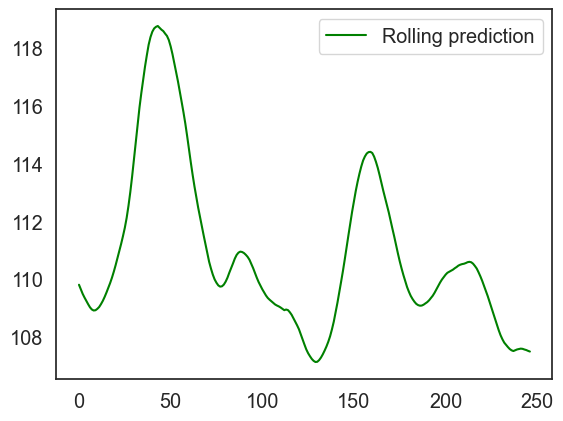

In [79]:
valid = valid.rename(columns={0:'Close'})
plt.plot(valid['prediction'],color="green", label = "Rolling prediction")
plt.legend()
plt.show()

## Conclussion 

this assignment has been great to learn varies model, i really enjoyed the stock analysis it is challenging but I learnt a lot, i built so many variation of the lstm models trying to achieve a successful predicts the stock price. this was my best CA this year  

## Bibliography
Ali, M., 2023. NLTK Sentiment Analysis Tutorial for Beginners. [Online] 
Available at: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
[Accessed 26 06 2023].
BROWNLEE, J., 2023. How to Develop Convolutional Neural Network Models for Time Series Forecasting. [Online] 
Available at: https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
[Accessed 12 11 2018].
iavan, 2020. Is it possible to predict stock prices with a neural network?. [Online] 
Available at: https://towardsdatascience.com/is-it-possible-to-predict-stock-prices-with-a-neural-network-d750af3de50b
[Accessed 07 07 2023 ].
Martin, B., 2023. Predicting Reddit News Sentiment with Naive Bayes and Other Text Classifiers. [Online] 
Available at: https://www.learndatasci.com/free-data-science-books/
[Accessed 06 07 2023].
matplotlib., 2023 . matplotlib.. [Online] 
Available at: https://matplotlib.org/stable/tutorials/index.html
[Accessed 07 07 2023 ].
pandas, 2023. Pandas. [Online] 
Available at: https://pandas.pydata.org/docs/user_guide/dsintro.html
[Accessed 07 07 2023].
sckit-learn, 2023 . sckit-learn. [Online] 
Available at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
[Accessed 07 07 2023 ].










